In [ ]:

#Machine learning with natural diaster implementation on crop cultivation in agriculture process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crop/natural_disaster_dataset.csv')

#data=pd.read_csv("natural_disaster_dataset.csv", encoding='ISO-8859-1')

Mounted at /content/drive


In [ ]:
data.head()

,disaster_id,year,month,disaster_type,disaster_name,primary_affect,secondary_affect,state_name,crops_affected,season,nature_of_disaster
0,1,1995,sep,Extreme temp,Heat wave,Hot wind,affects crops,Bihar,ginger (dry),winter,occasional
1,2,1995,sep,Extreme temp,Heat wave,Hot wind,affects crops,Karnataka,cardamon,winter,occasional
2,3,1995,sep,Extreme temp,Heat wave,Hot wind,affects crops,Madhya pradesh,black pepper,winter,occasional
3,4,1995,sep,Extreme temp,Heat wave,Hot wind,affects crops,Maharashtra,maize,autumn,occasional
4,5,1995,sep,Extreme temp,Heat wave,Hot wind,affects crops,Madyha Pradesh,chillies,autumn,occasional


In [ ]:
data.columns

Index(['disaster_id', 'year', 'month', 'disaster_type', 'disaster_name',
       'primary_affect', 'secondary_affect', 'state_name', 'crops_affected',
       'season', 'nature_of_disaster'],
      dtype='object')

In [ ]:
data.tail()

,disaster_id,year,month,disaster_type,disaster_name,primary_affect,secondary_affect,state_name,crops_affected,season,nature_of_disaster
695,696,2020,jan,NaN,Cold wave,cold wind,NaN,Assam,chillies (dry),winter,occasional
696,697,2020,may,NaN,Tornado,affects rainfall,NaN,Madhya Pradesh,urad,summer,seasonal
697,698,2020,oct,Flood,Flood,heavy rainfall,NaN,Himachal Pradesh,wheat,autumn,seasonal
698,699,2020,dec,Flood,Flood,heavy rainfall,affects crops,Maharashtra,moong,winter,seasonal
699,700,2021,feb,Glacial Burst,Flood,affect the whole place,affects crops,Odisha,tea,spring,occasional


In [ ]:
data.describe()


,disaster_id,year
count,700.00000,700.000000
mean,350.50000,2007.715714
std,202.21688,7.599829
min,1.00000,1995.000000
25%,175.75000,2001.000000
50%,350.50000,2008.000000
75%,525.25000,2014.250000
max,700.00000,2021.000000


In [ ]:
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         4
disaster_name         2
primary_affect        3
secondary_affect      4
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
data.disaster_type = data.disaster_type.fillna("unknown")
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         2
primary_affect        3
secondary_affect      4
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
data.disaster_name= data.disaster_name.fillna("unknown")
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         0
primary_affect        3
secondary_affect      4
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
data.primary_affect= data.disaster_name.fillna("unknown")
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         0
primary_affect        0
secondary_affect      4
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
#---display the null data with sum of crop affected adn replace unknow values
data.secondary_affect= data.secondary_affect.fillna("unknown")
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         0
primary_affect        0
secondary_affect      0
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
#---display the null data with sum of crop affected
data["crops_affected"]= data["crops_affected"].fillna(data["crops_affected"].mode()[0])

In [ ]:
#---display the null data with sum
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         0
primary_affect        0
secondary_affect      0
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
#---REplace the empty data of season with [0]
data["season"]= data["season"].fillna(data["season"].mode()[0])
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         0
primary_affect        0
secondary_affect      0
state_name            0
crops_affected        0
season                0
nature_of_disaster    3
dtype: int64


In [ ]:
#---REplace the empty data of nature_of_disaster with [0]
data["nature_of_disaster"]= data["nature_of_disaster"].fillna(data["nature_of_disaster"].mode()[0])
print(data.isnull().sum())

disaster_id           0
year                  0
month                 0
disaster_type         0
disaster_name         0
primary_affect        0
secondary_affect      0
state_name            0
crops_affected        0
season                0
nature_of_disaster    0
dtype: int64


In [ ]:
#---display dataset datatype
print(data.shape)
print("\n")
print(data.dtypes)

(700, 11)


disaster_id            int64
year                   int64
month                 object
disaster_type         object
disaster_name         object
primary_affect        object
secondary_affect      object
state_name            object
crops_affected        object
season                object
nature_of_disaster    object
dtype: object


In [ ]:
#---display info  based on    year
for column in data["year"].values.tolist():
    data["year"].values.tolist()

print (data["year"].value_counts())


1998    41
2017    40
2018    34
2005    34
2009    33
1996    32
2004    30
2020    30
2007    29
2008    28
1999    28
2019    26
2014    26
2006    26
2003    25
2013    25
1997    24
2012    24
2015    24
2002    23
2001    23
2011    23
2016    20
1995    18
2010    17
2000    16
2021     1
Name: year, dtype: int64


In [ ]:
#---display info  based on    month
for column in data["month"].values.tolist():
    data["month"].values.tolist()

print (data["month"].value_counts())

aug     104
oct      86
jun      82
sep      73
jul      72
may      66
nov      63
jan      47
dec      38
apr      27
mar      25
feb      16
sept      1
Name: month, dtype: int64


In [ ]:
#---display info  based on    disaster_type
for column in data["disaster_type"].values.tolist():
    data["disaster_type"].values.tolist()

print (data["disaster_type"].value_counts())

Flood                 264
Wind storm            191
Slide                  75
Earthquake             34
Extreme  temp          28
Extreme temp           21
Drought                20
Exterme temp           16
Torrential rain        15
Storm                  11
unknown                 4
Exterme Cold            3
Flash Flood             3
Mud Strom               2
Insect infestation      2
Strom                   2
Wild fire               1
Wave/surge              1
High Wind               1
High Rainfall           1
Torrential rains        1
Monsoon                 1
Slides                  1
Cyclone                 1
Glacial Burst           1
Name: disaster_type, dtype: int64


In [ ]:
#---display info  based on    disaster_name
for column in data["disaster_name"].values.tolist():
    data["disaster_name"].values.tolist()

print (data["disaster_name"].value_counts())


Flood                 264
Cyclone               138
Landslide              60
Storm                  37
Earthquake             35
Cold wave              20
Drought                20
Tornado                18
Heat  wave             16
Heat wave              16
Flash Flood            15
Avalanche               8
Heat Wave               8
Cold Wave               8
Land Slide              7
Typhoon                 3
Lightning               3
Winter                  2
unknown                 2
Cylcone                 2
Hailstorm               2
Insect infestation      2
Dust storm              2
Tropical  storm         1
Monsoon Rains           1
Flash Floods            1
Avalanches              1
Lighting                1
Tsunami                 1
Strom                   1
Heavy Snow              1
Forest                  1
Tidal wave              1
Heatwave                1
Lightning               1
Name: disaster_name, dtype: int64


In [ ]:
#---display info  based on    primary_affect
for column in data["primary_affect"].values.tolist():
    data["primary_affect"].values.tolist()

print (data["primary_affect"].value_counts())

Flood                 264
Cyclone               138
Landslide              60
Storm                  37
Earthquake             35
Cold wave              20
Drought                20
Tornado                18
Heat  wave             16
Heat wave              16
Flash Flood            15
Avalanche               8
Heat Wave               8
Cold Wave               8
Land Slide              7
Typhoon                 3
Lightning               3
Winter                  2
unknown                 2
Cylcone                 2
Hailstorm               2
Insect infestation      2
Dust storm              2
Tropical  storm         1
Monsoon Rains           1
Flash Floods            1
Avalanches              1
Lighting                1
Tsunami                 1
Strom                   1
Heavy Snow              1
Forest                  1
Tidal wave              1
Heatwave                1
Lightning               1
Name: primary_affect, dtype: int64


In [ ]:
for column in data["secondary_affect"].values.tolist():
    data["secondary_affect"].values.tolist()

print (data["secondary_affect"].value_counts())

affects crops       535
affects crops       119
building affect      36
affects rainfall      4
unknown               4
cold wind             2
Name: secondary_affect, dtype: int64


In [ ]:
#---display info  based on    crops_affected
for column in data["crops_affected"].values.tolist():
    data["crops_affected"].values.tolist()

print (data["crops_affected"].value_counts())

sunflower              40
paddy                  40
chillies               33
wheat                  32
moong                  32
urad                   32
maize                  30
gram                   30
coffee                 29
jute                   27
cashewnut              23
rape-seed & mustard    22
other oilseeds         21
sugarcane              20
barley                 20
millets                19
coriander              19
onion                  19
banana                 19
black pepper           19
cardamon               19
ginger (dry)           18
ragi                   18
tea                    16
chillies (dry)         16
arhar                  14
peas & beans           13
millets (small)        13
potato                 13
mesta                  13
groundnut              11
castor seed             4
cotton                  4
bajra                   2
Name: crops_affected, dtype: int64


In [ ]:
#--display the monsoon    , summer autumn    winter        spring          Seasoanl information
for column in data["season"].values.tolist():
    data["season"].values.tolist()

print (data["season"].value_counts())

monsoon    210
summer     170
autumn     169
winter     106
spring      45
Name: season, dtype: int64


In [ ]:
#--display the seasonal, occasional    nature_of_disaster information
for column in data["nature_of_disaster"].values.tolist():
    data["nature_of_disaster"].values.tolist()

print (data["nature_of_disaster"].value_counts())

seasonal      547
occasional    153
Name: nature_of_disaster, dtype: int64


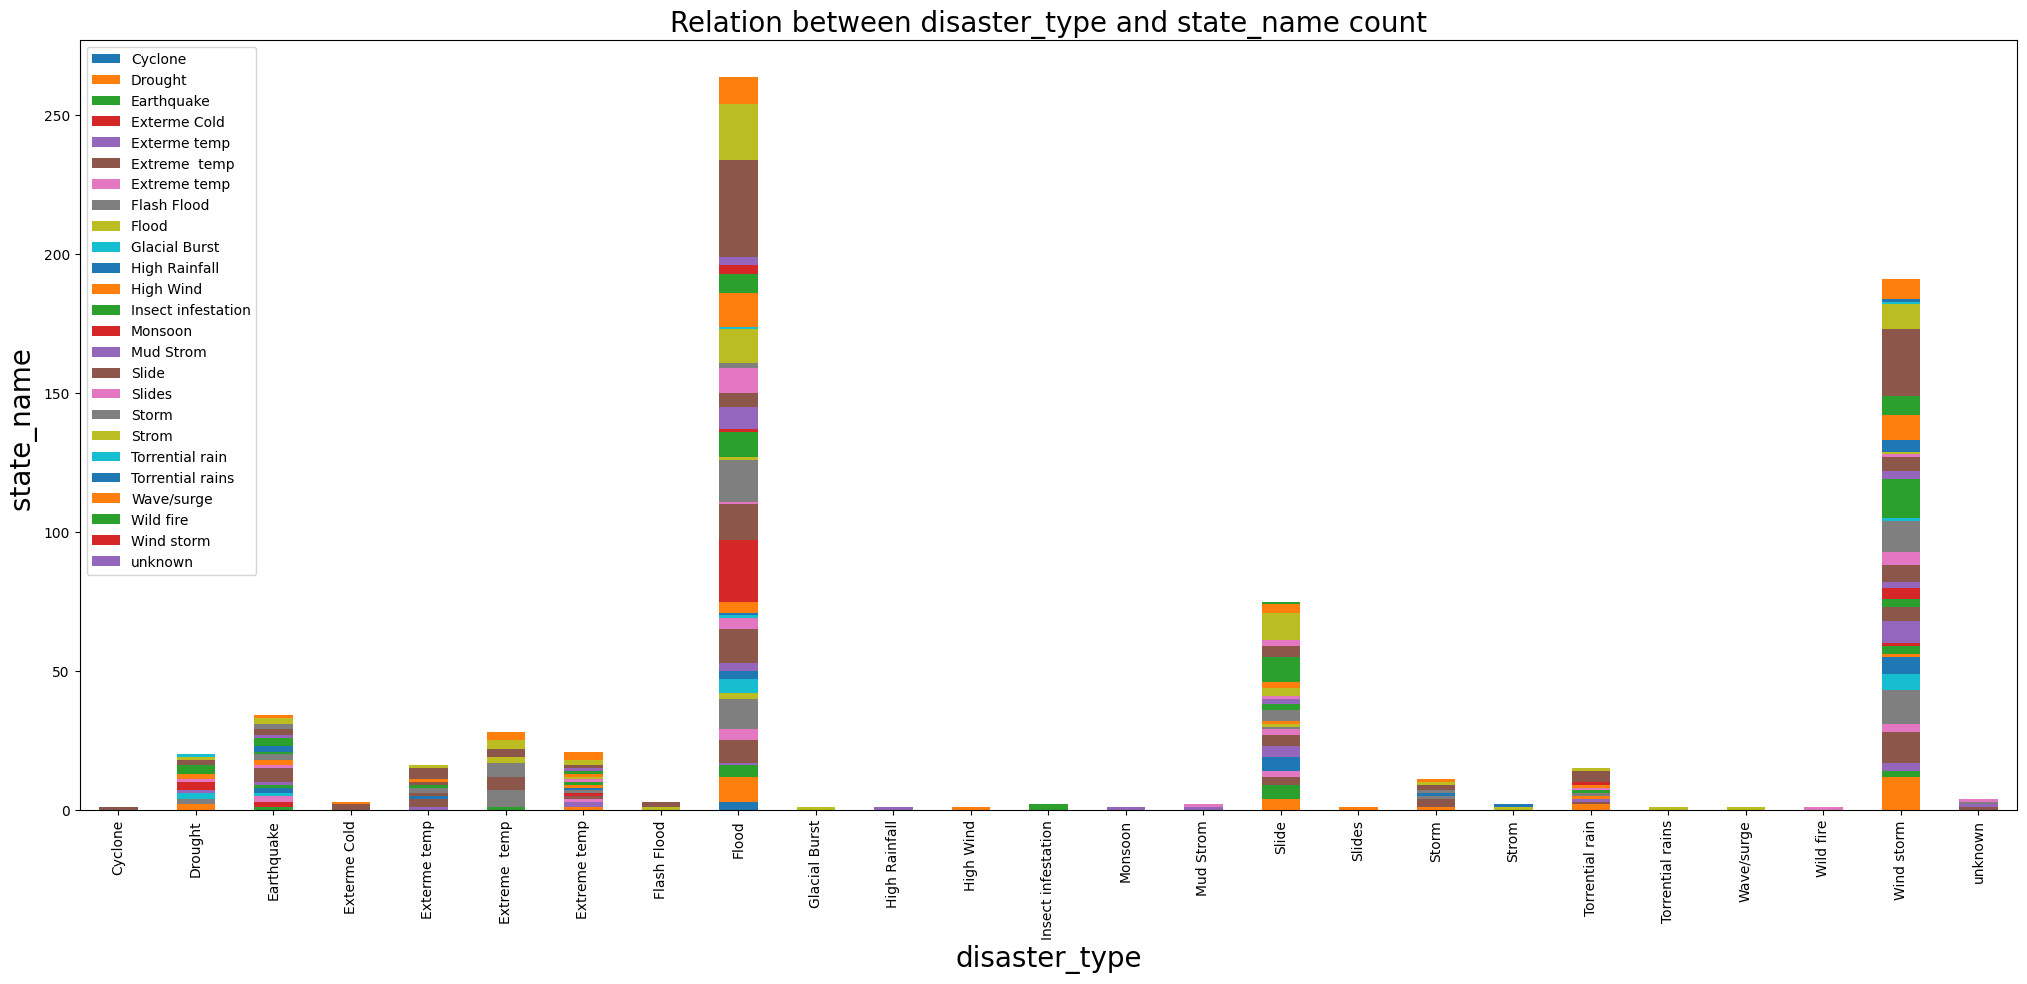

In [ ]:
# Relation between disaster_type and state_name
temp = data[['disaster_type', 'state_name']].groupby(['disaster_type', 'state_name']).size().reset_index()
ax = temp.set_index(['disaster_type', 'state_name']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(25, 10))
ax.set_title('Relation between disaster_type and state_name count', fontsize=20)
ax.set_xlabel('disaster_type', fontsize=20)
ax.set_ylabel('state_name ', fontsize=20)
ax.legend(temp['disaster_type'].unique())
plt.show()

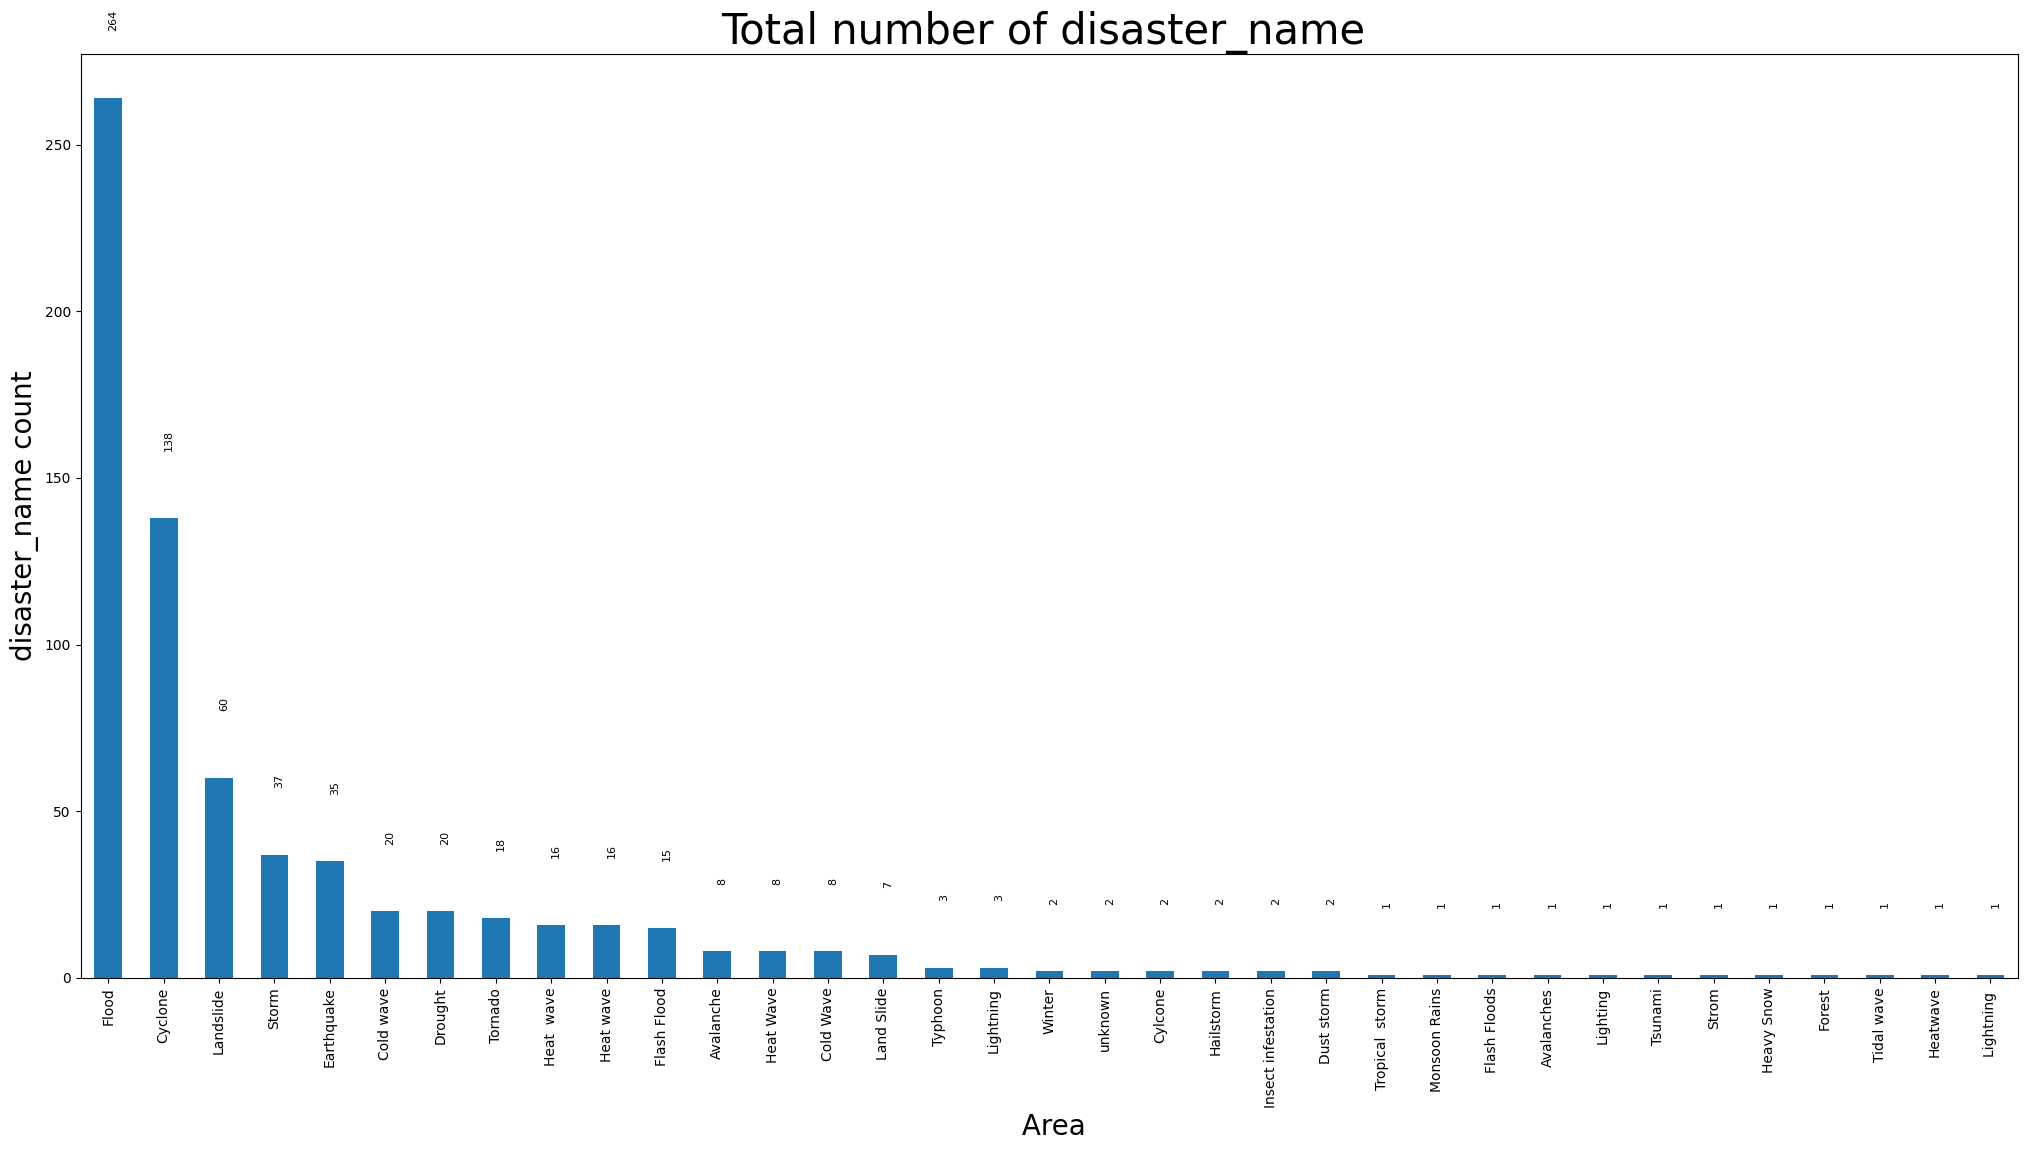

In [ ]:
# Relation between disaster_name and count
count = data['disaster_name'].value_counts()
ax = count.plot(kind='bar', figsize=(25, 12))
ax.set_xlabel(' Area', fontsize=20)
ax.set_ylabel('disaster_name count', fontsize=20)
ax.set_title('Total number of disaster_name ', fontsize=30)
for i, v in enumerate(count):
    plt.text(i, v+20, str(v), rotation=90, verticalalignment='bottom', fontsize=8)
plt.show()

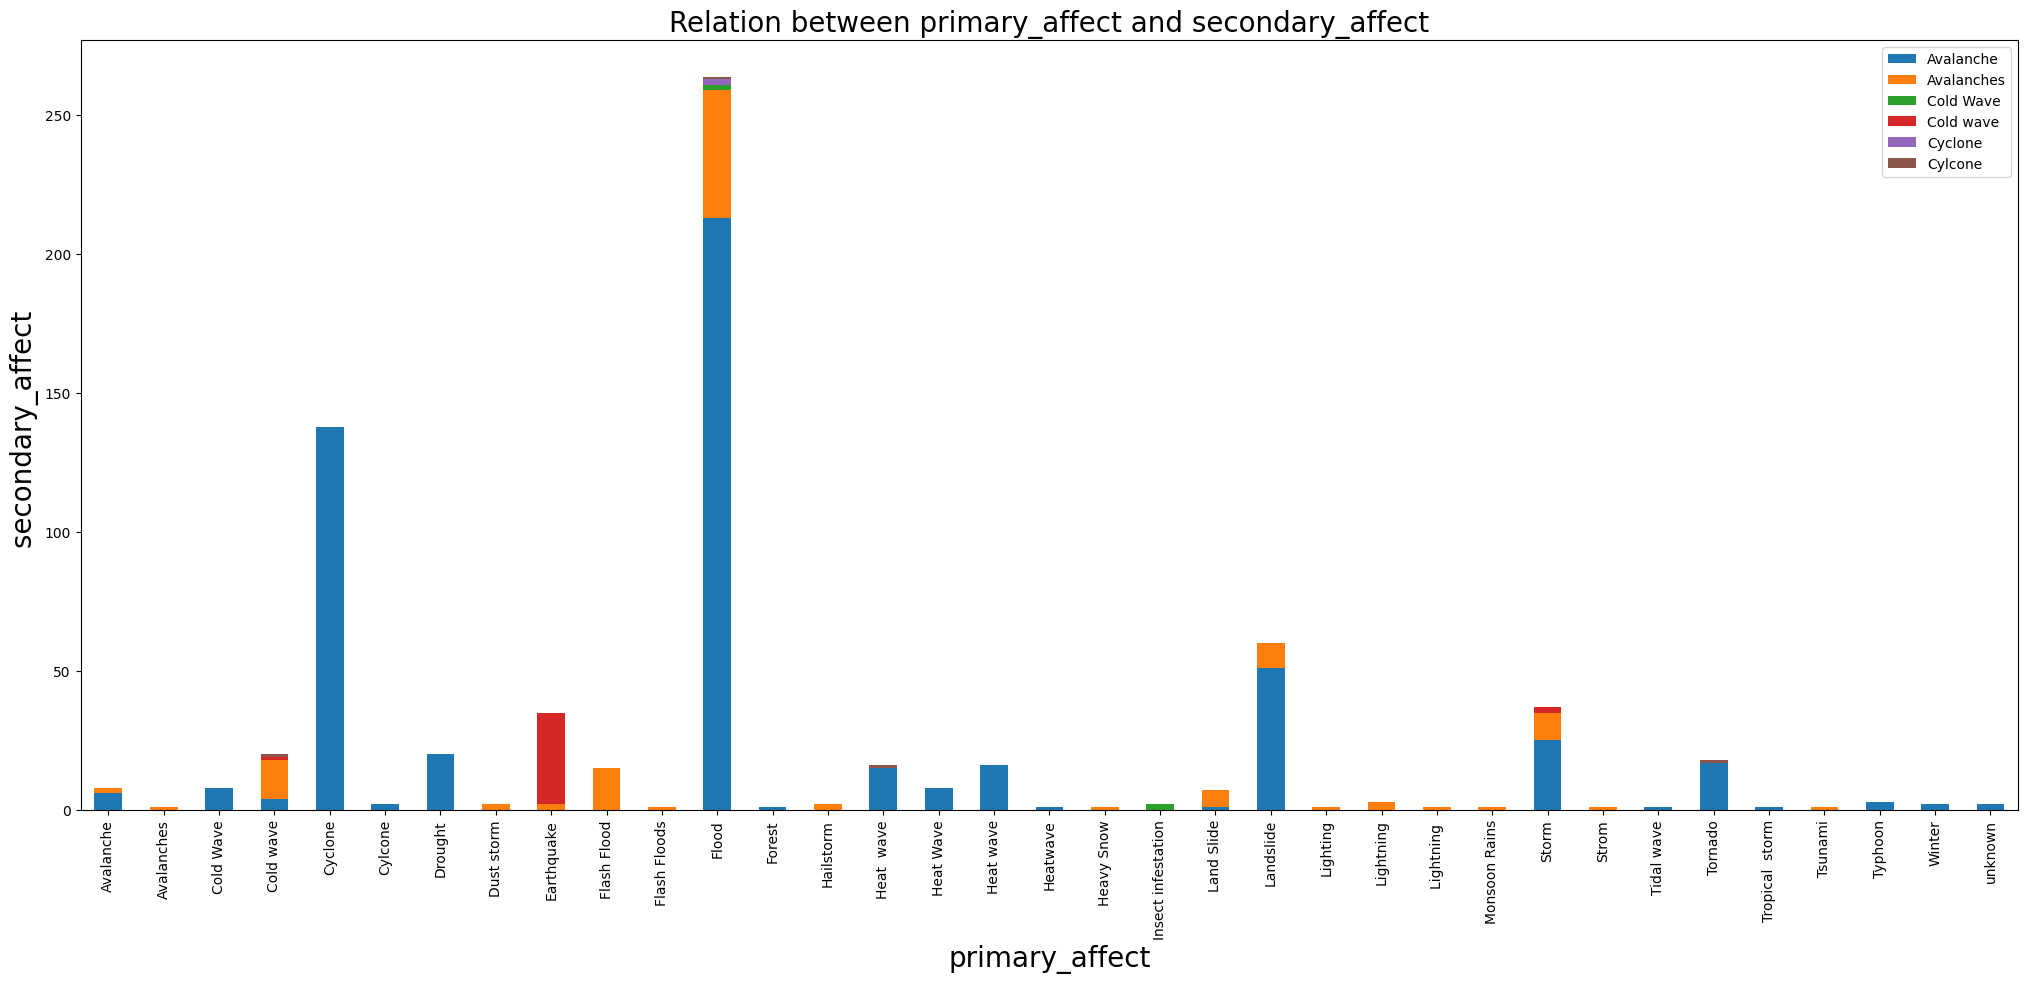

In [ ]:
# Relation between primary_affect and secondary_affect
temp = data[['primary_affect', 'secondary_affect']].groupby(['primary_affect', 'secondary_affect']).size().reset_index()
ax = temp.set_index(['primary_affect', 'secondary_affect']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(25, 10))
ax.set_title('Relation between primary_affect and secondary_affect', fontsize=20)
ax.set_xlabel('primary_affect', fontsize=20)
ax.set_ylabel('secondary_affect ', fontsize=20)
ax.legend(temp['primary_affect'].unique())
plt.show()

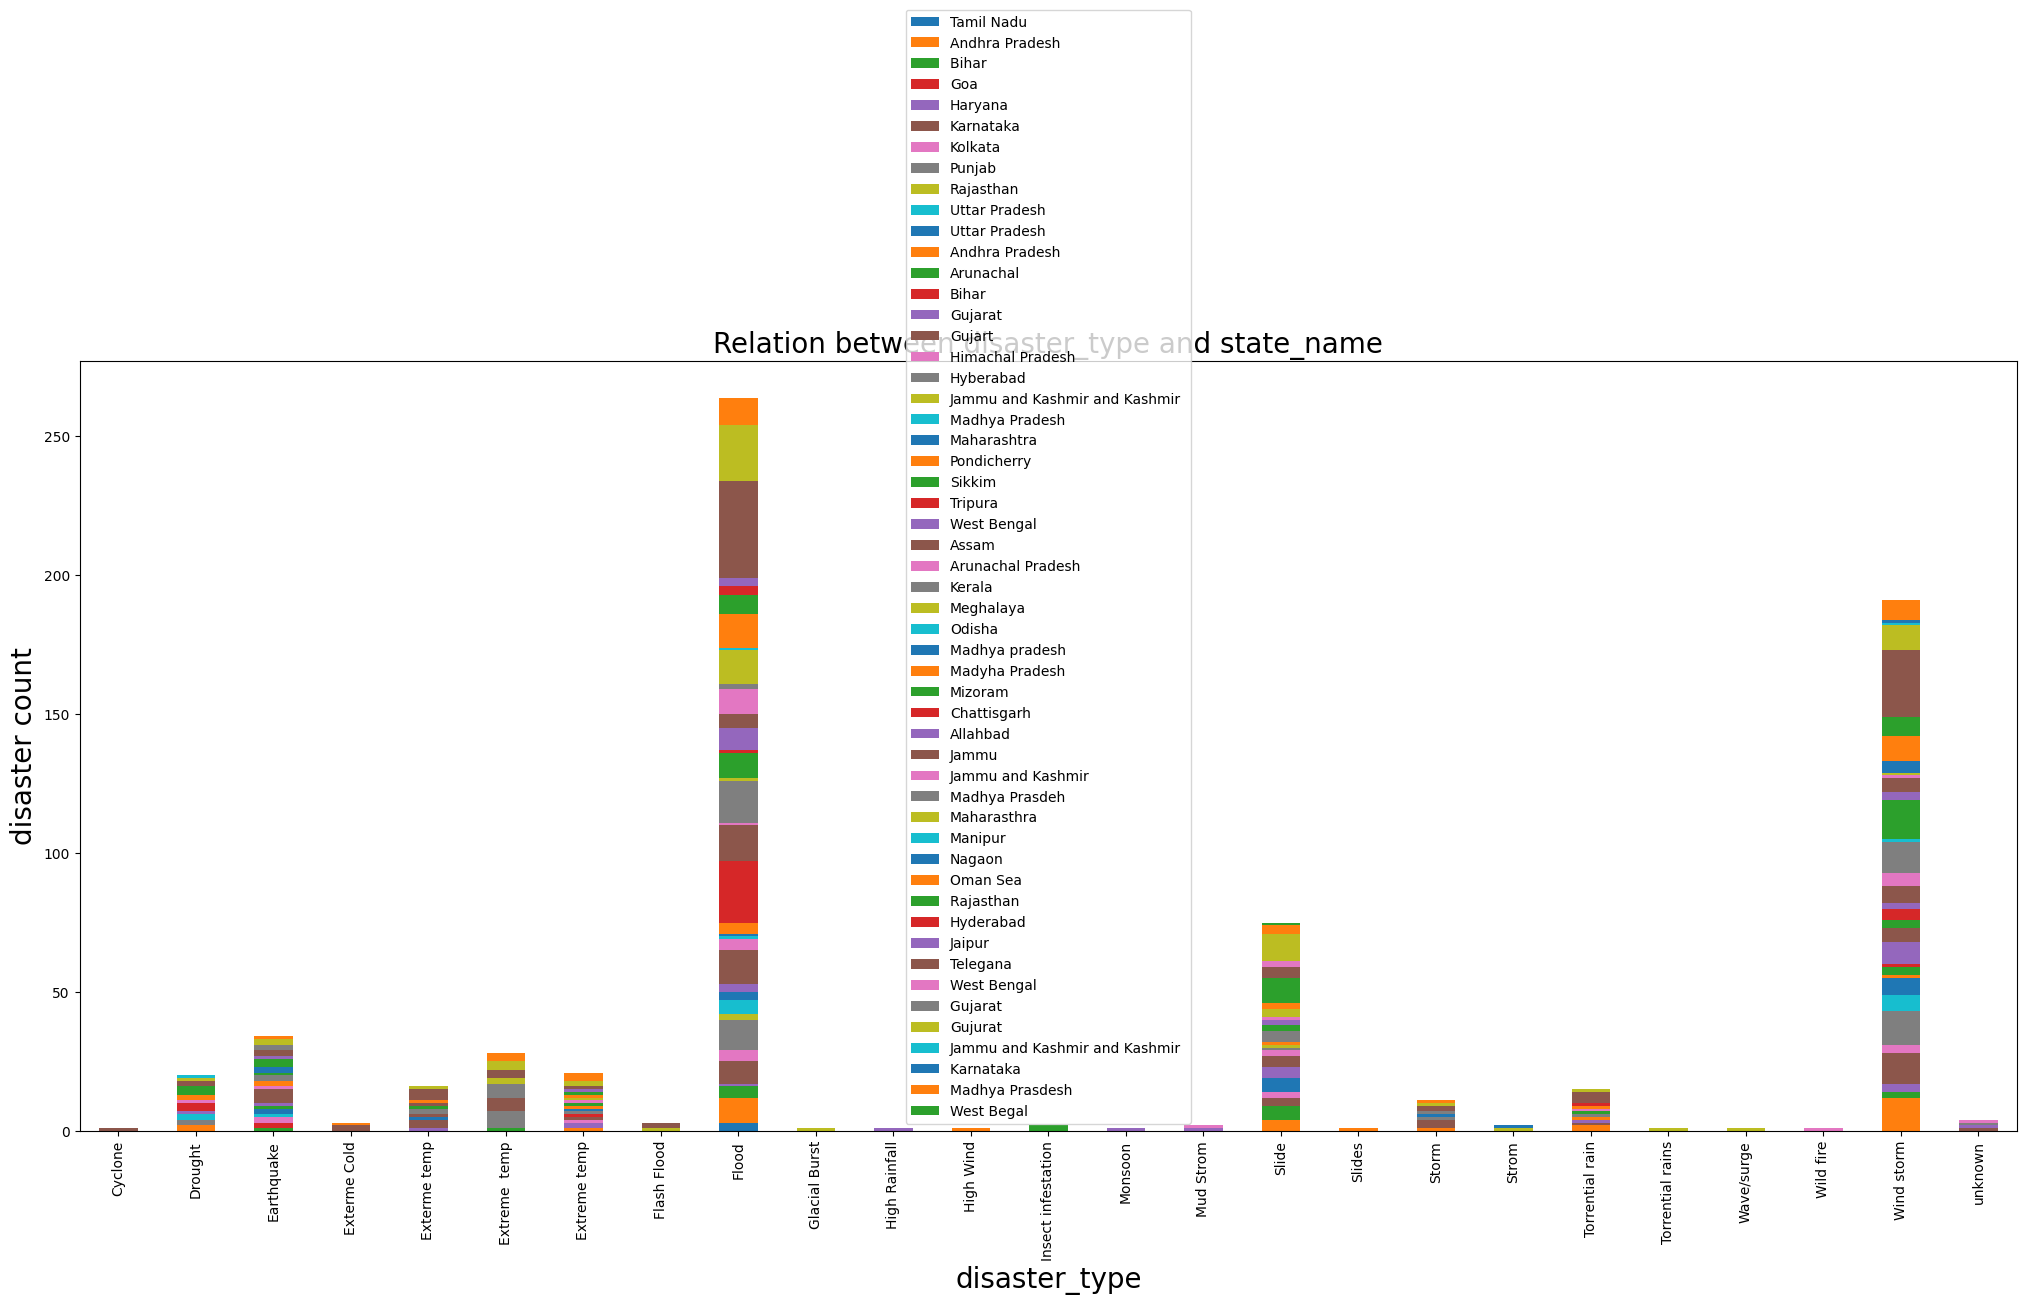

In [ ]:
# Relation between disaster_type and state_name
temp = data[['disaster_type', 'state_name']].groupby(['disaster_type', 'state_name']).size().reset_index()
ax = temp.set_index(['disaster_type', 'state_name']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(25, 10))
ax.set_title('Relation between disaster_type and state_name', fontsize=20)
ax.set_xlabel('disaster_type', fontsize=20)
ax.set_ylabel('disaster count', fontsize=20)
ax.legend(temp['state_name'].unique())
plt.show()

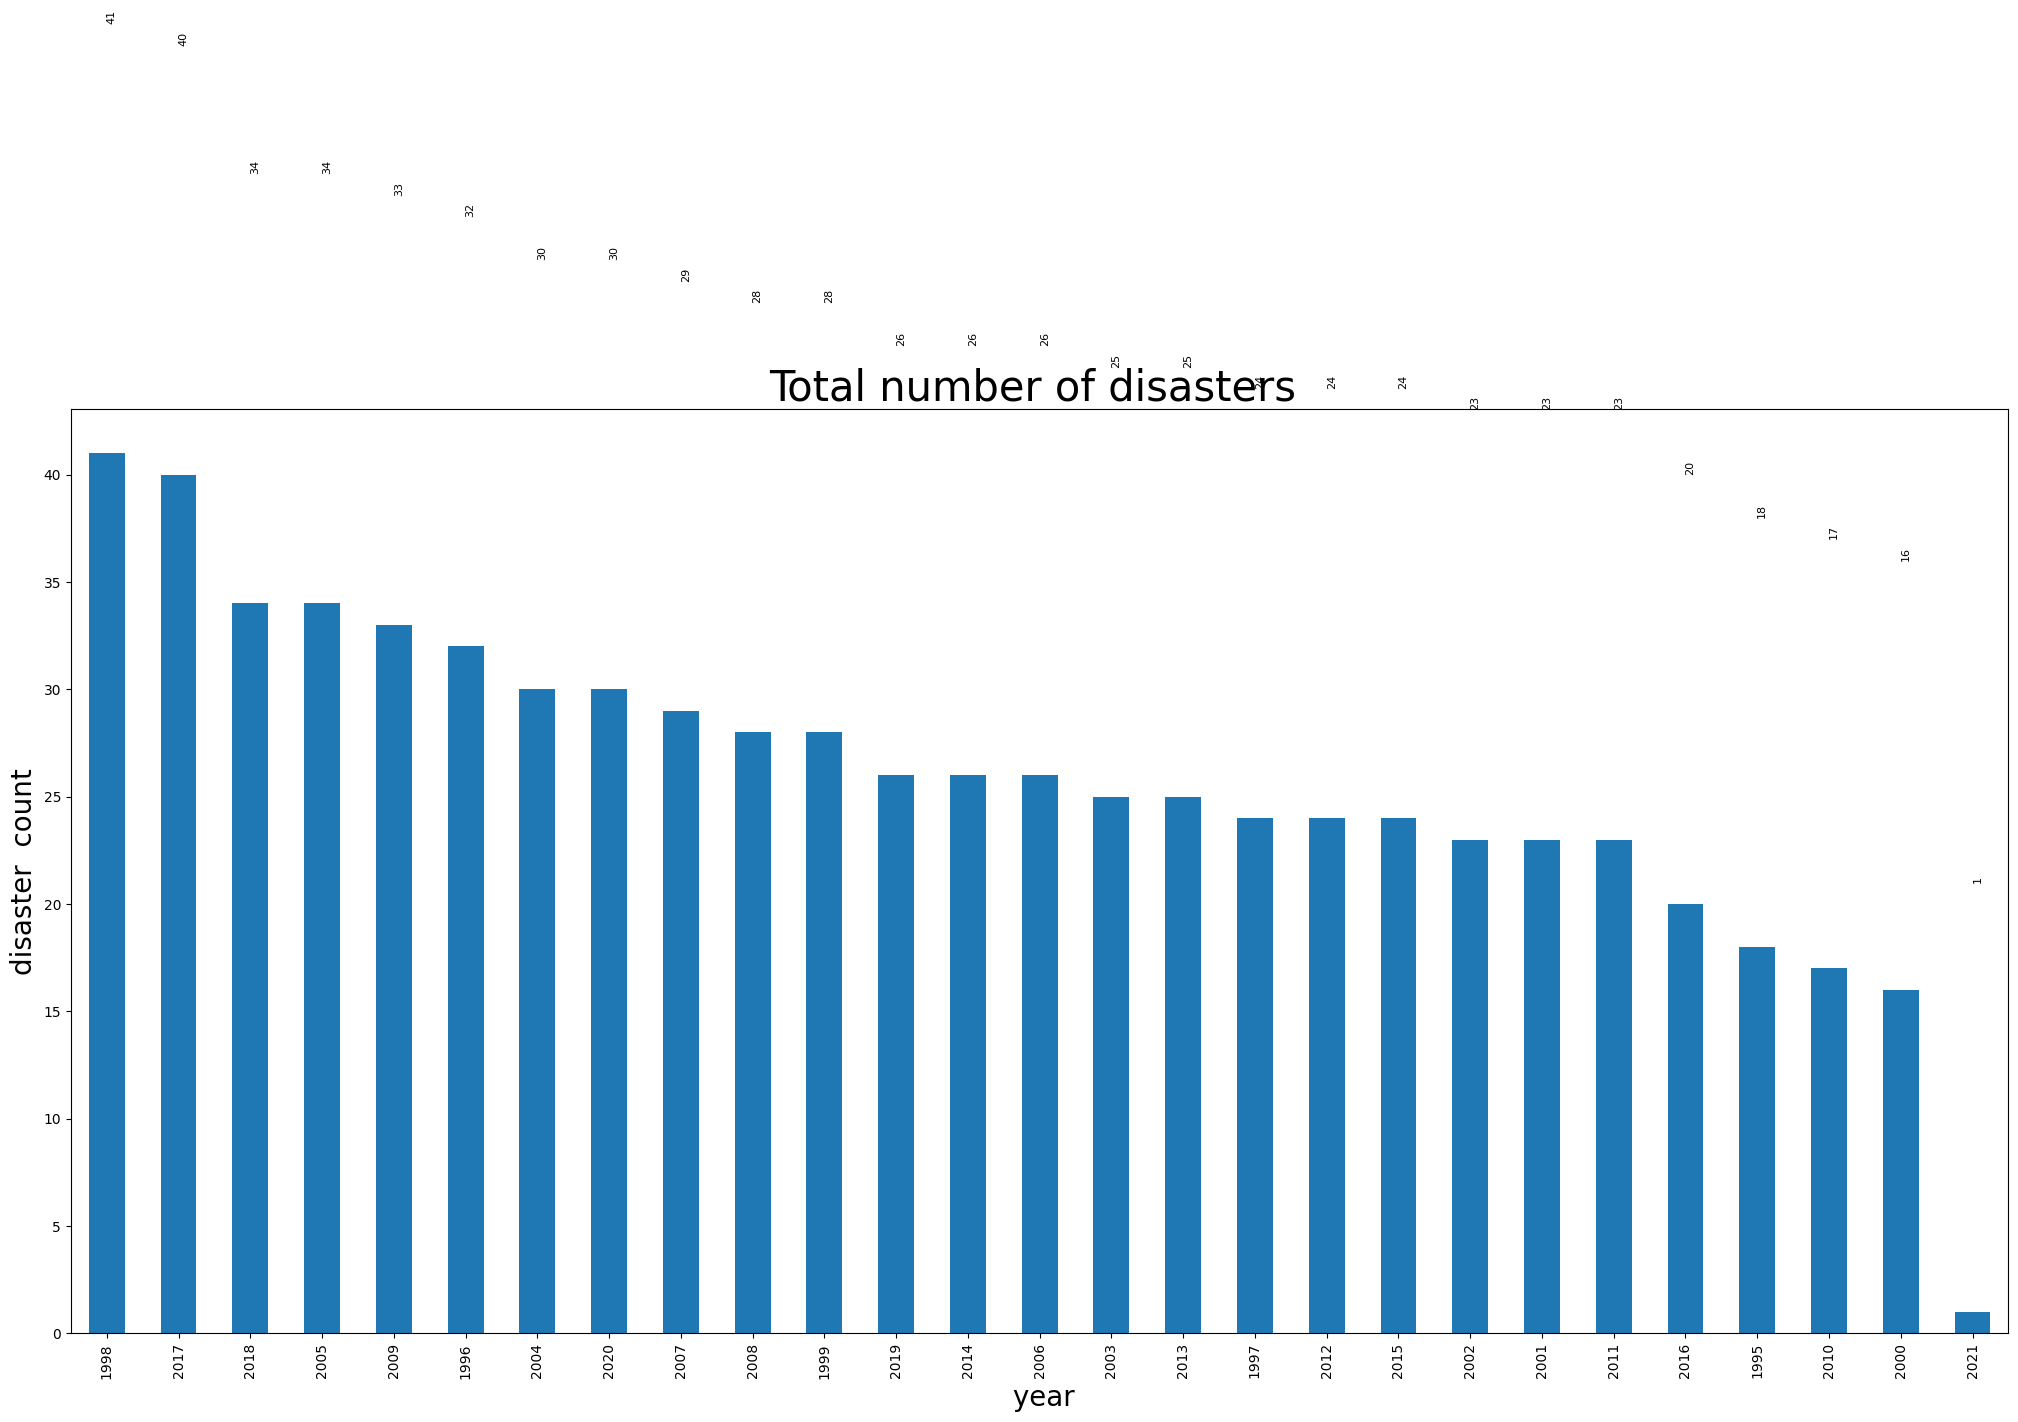

In [ ]:
# Total number of disasters year-wise
count = data['year'].value_counts()
ax = count.plot(kind='bar', figsize=(25, 12))
ax.set_xlabel(' year', fontsize=20)
ax.set_ylabel('disaster  count', fontsize=20)
ax.set_title('Total number of disasters ', fontsize=30)
for i, v in enumerate(count):
    plt.text(i, v+20, str(v), rotation=90, verticalalignment='bottom', fontsize=8)
plt.show()

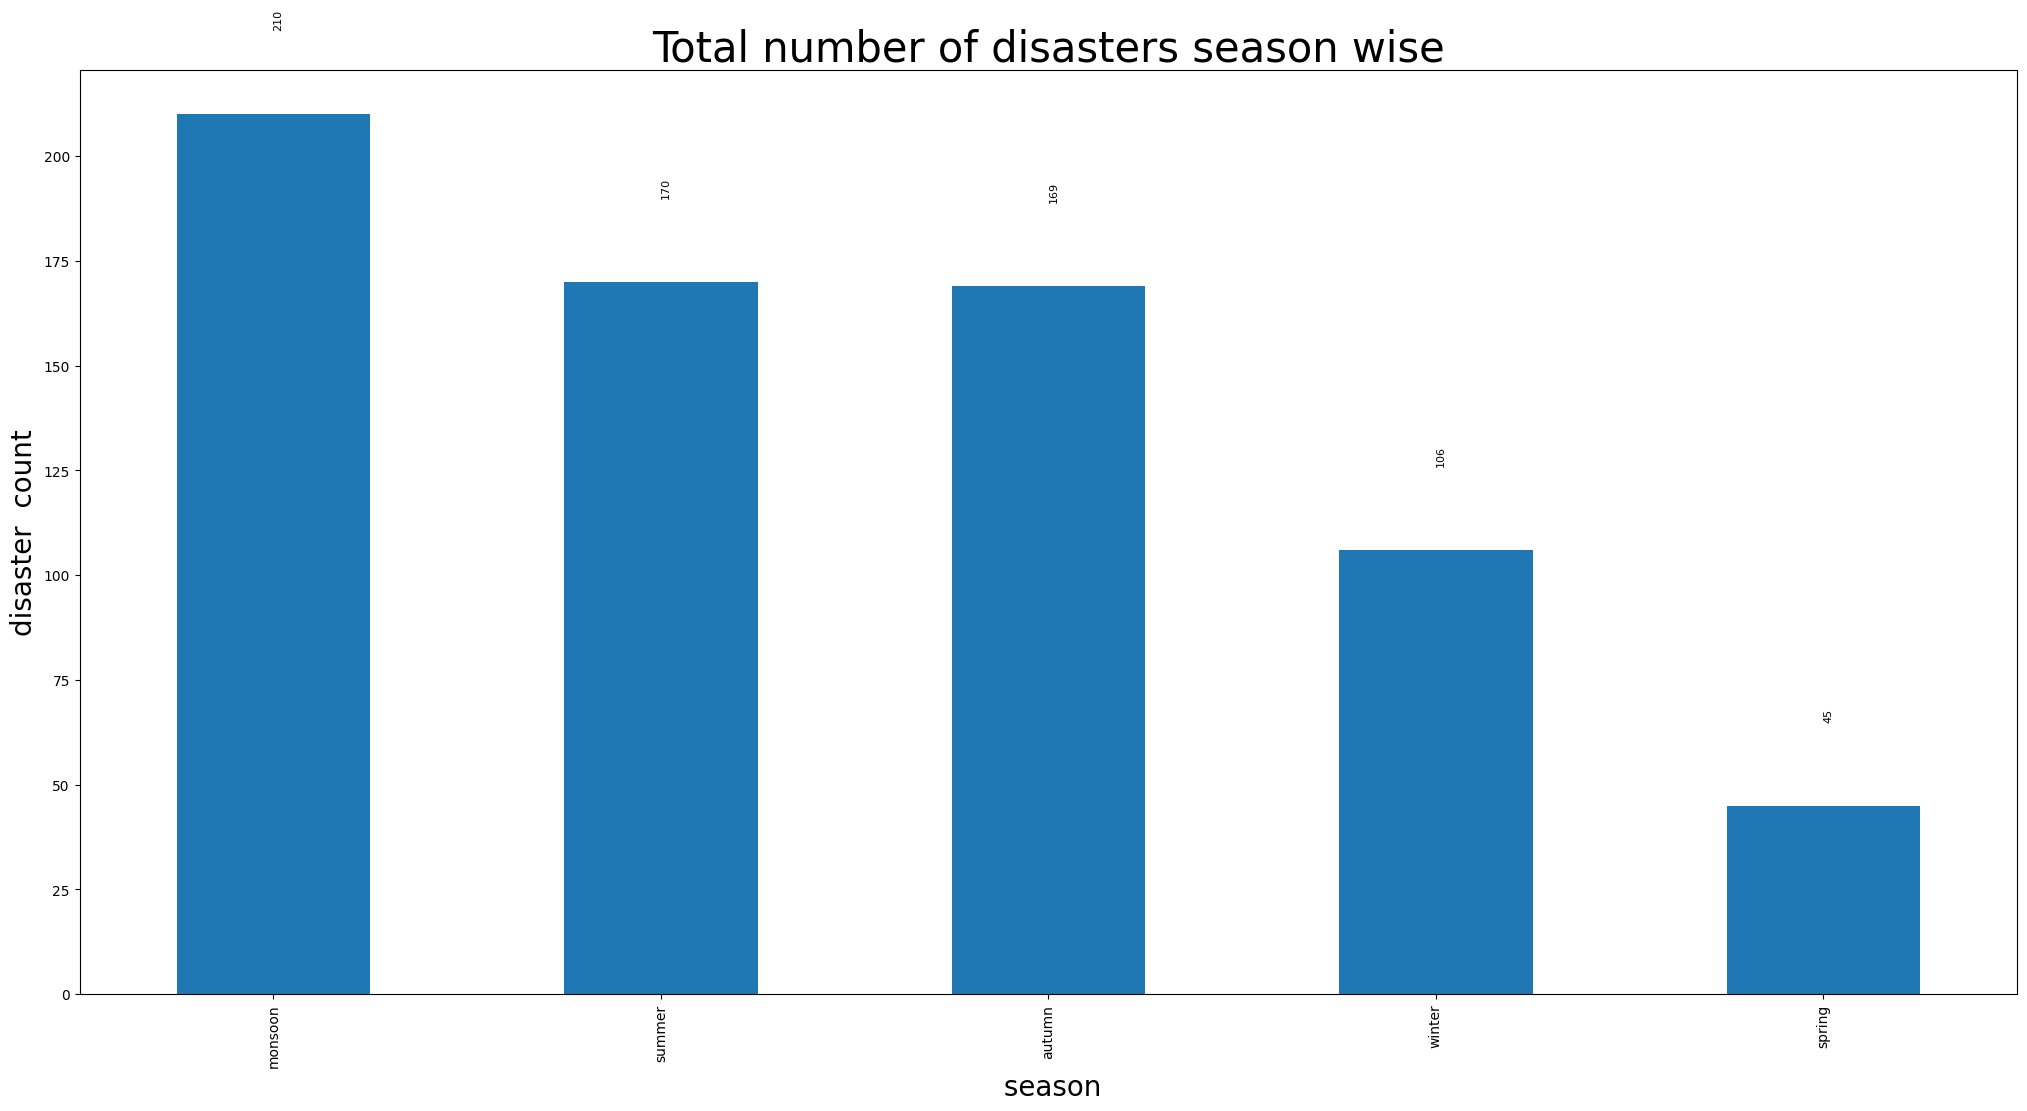

In [ ]:
# Total number of disasters season
count = data['season'].value_counts()
ax = count.plot(kind='bar', figsize=(25, 12))
ax.set_xlabel(' season', fontsize=20)
ax.set_ylabel('disaster  count', fontsize=20)
ax.set_title('Total number of disasters season wise', fontsize=30)
for i, v in enumerate(count):
    plt.text(i, v+20, str(v), rotation=90, verticalalignment='bottom', fontsize=8)
plt.show()

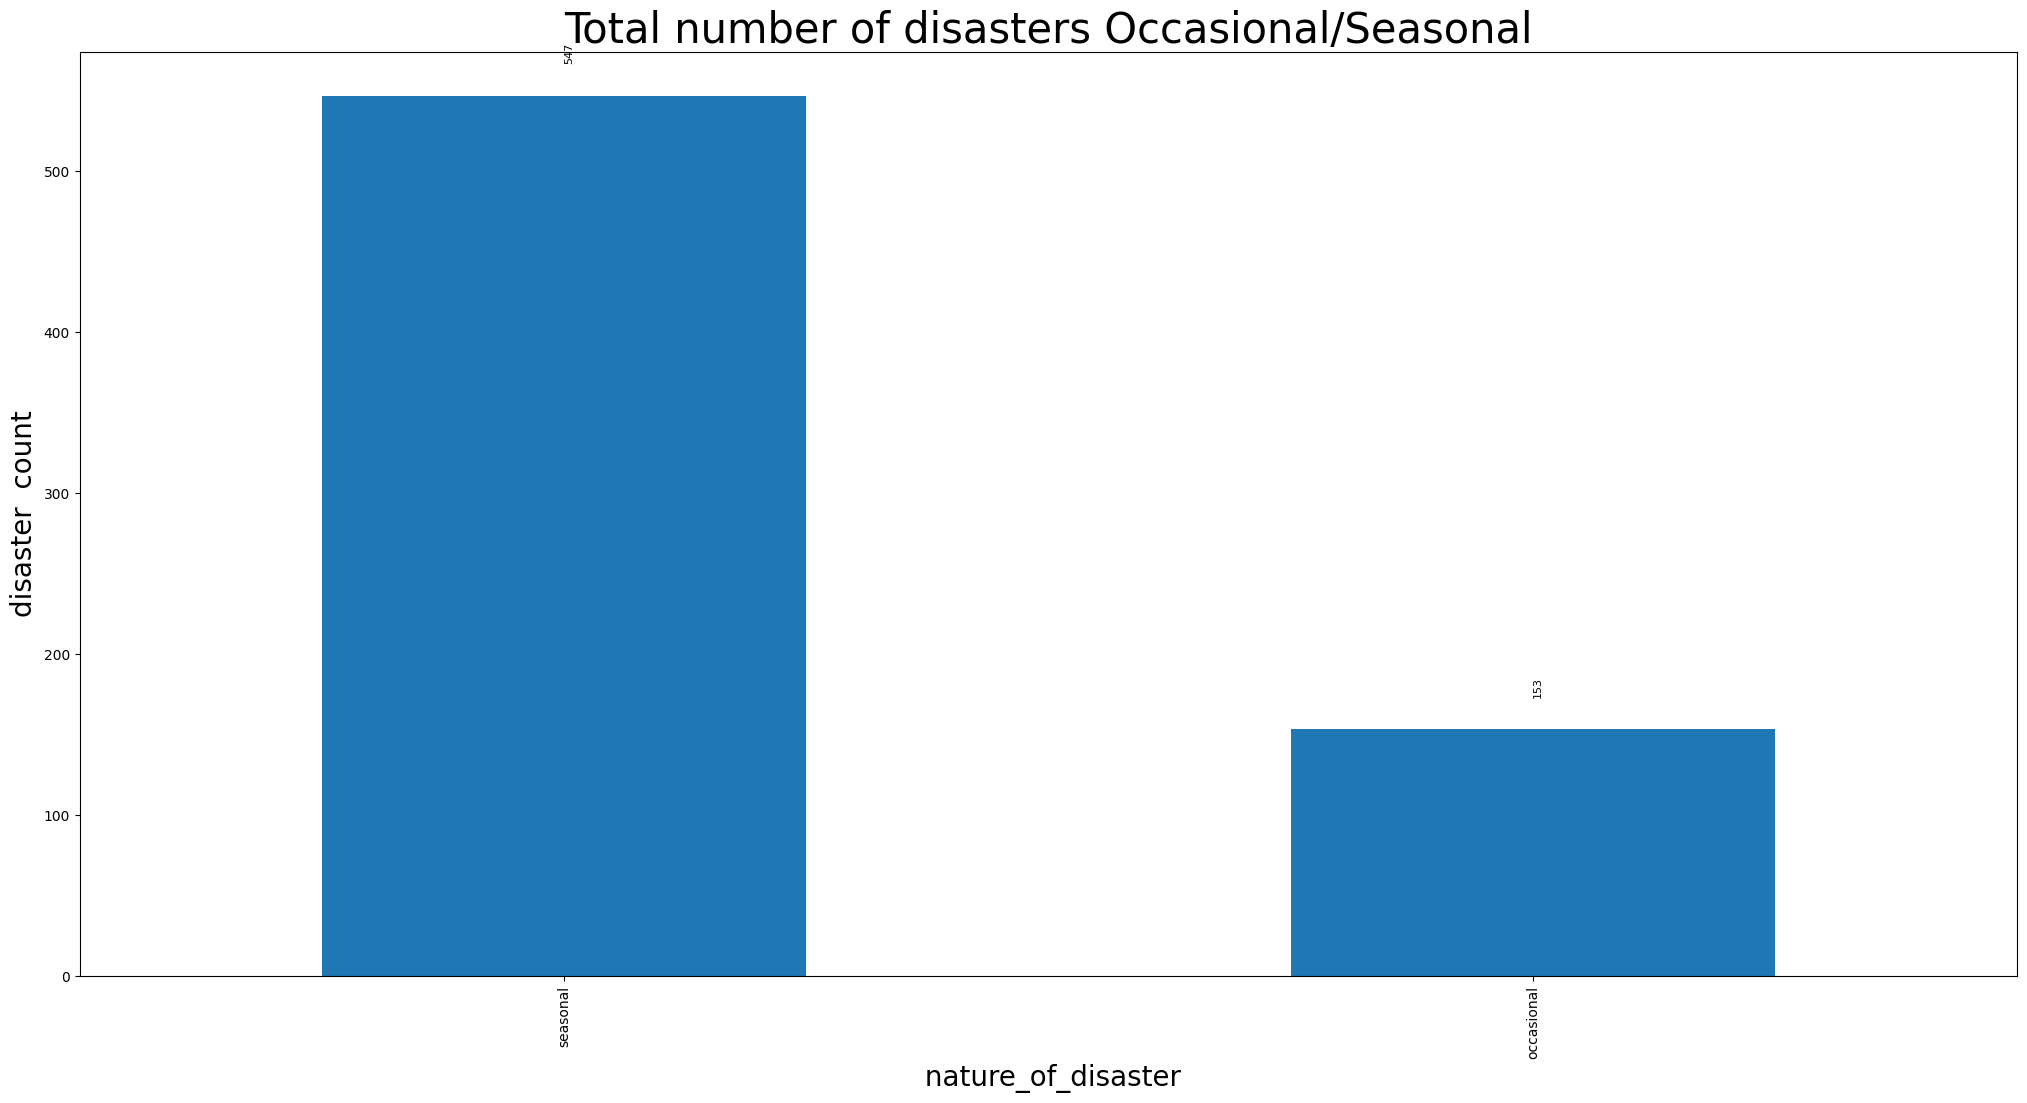

In [ ]:
# Total number of disasters disasters Occasional/Seasonal
count = data['nature_of_disaster'].value_counts()
ax = count.plot(kind='bar', figsize=(25, 12))
ax.set_xlabel(' nature_of_disaster', fontsize=20)
ax.set_ylabel('disaster  count', fontsize=20)
ax.set_title('Total number of disasters Occasional/Seasonal', fontsize=30)
for i, v in enumerate(count):
    plt.text(i, v+20, str(v), rotation=90, verticalalignment='bottom', fontsize=8)
plt.show()

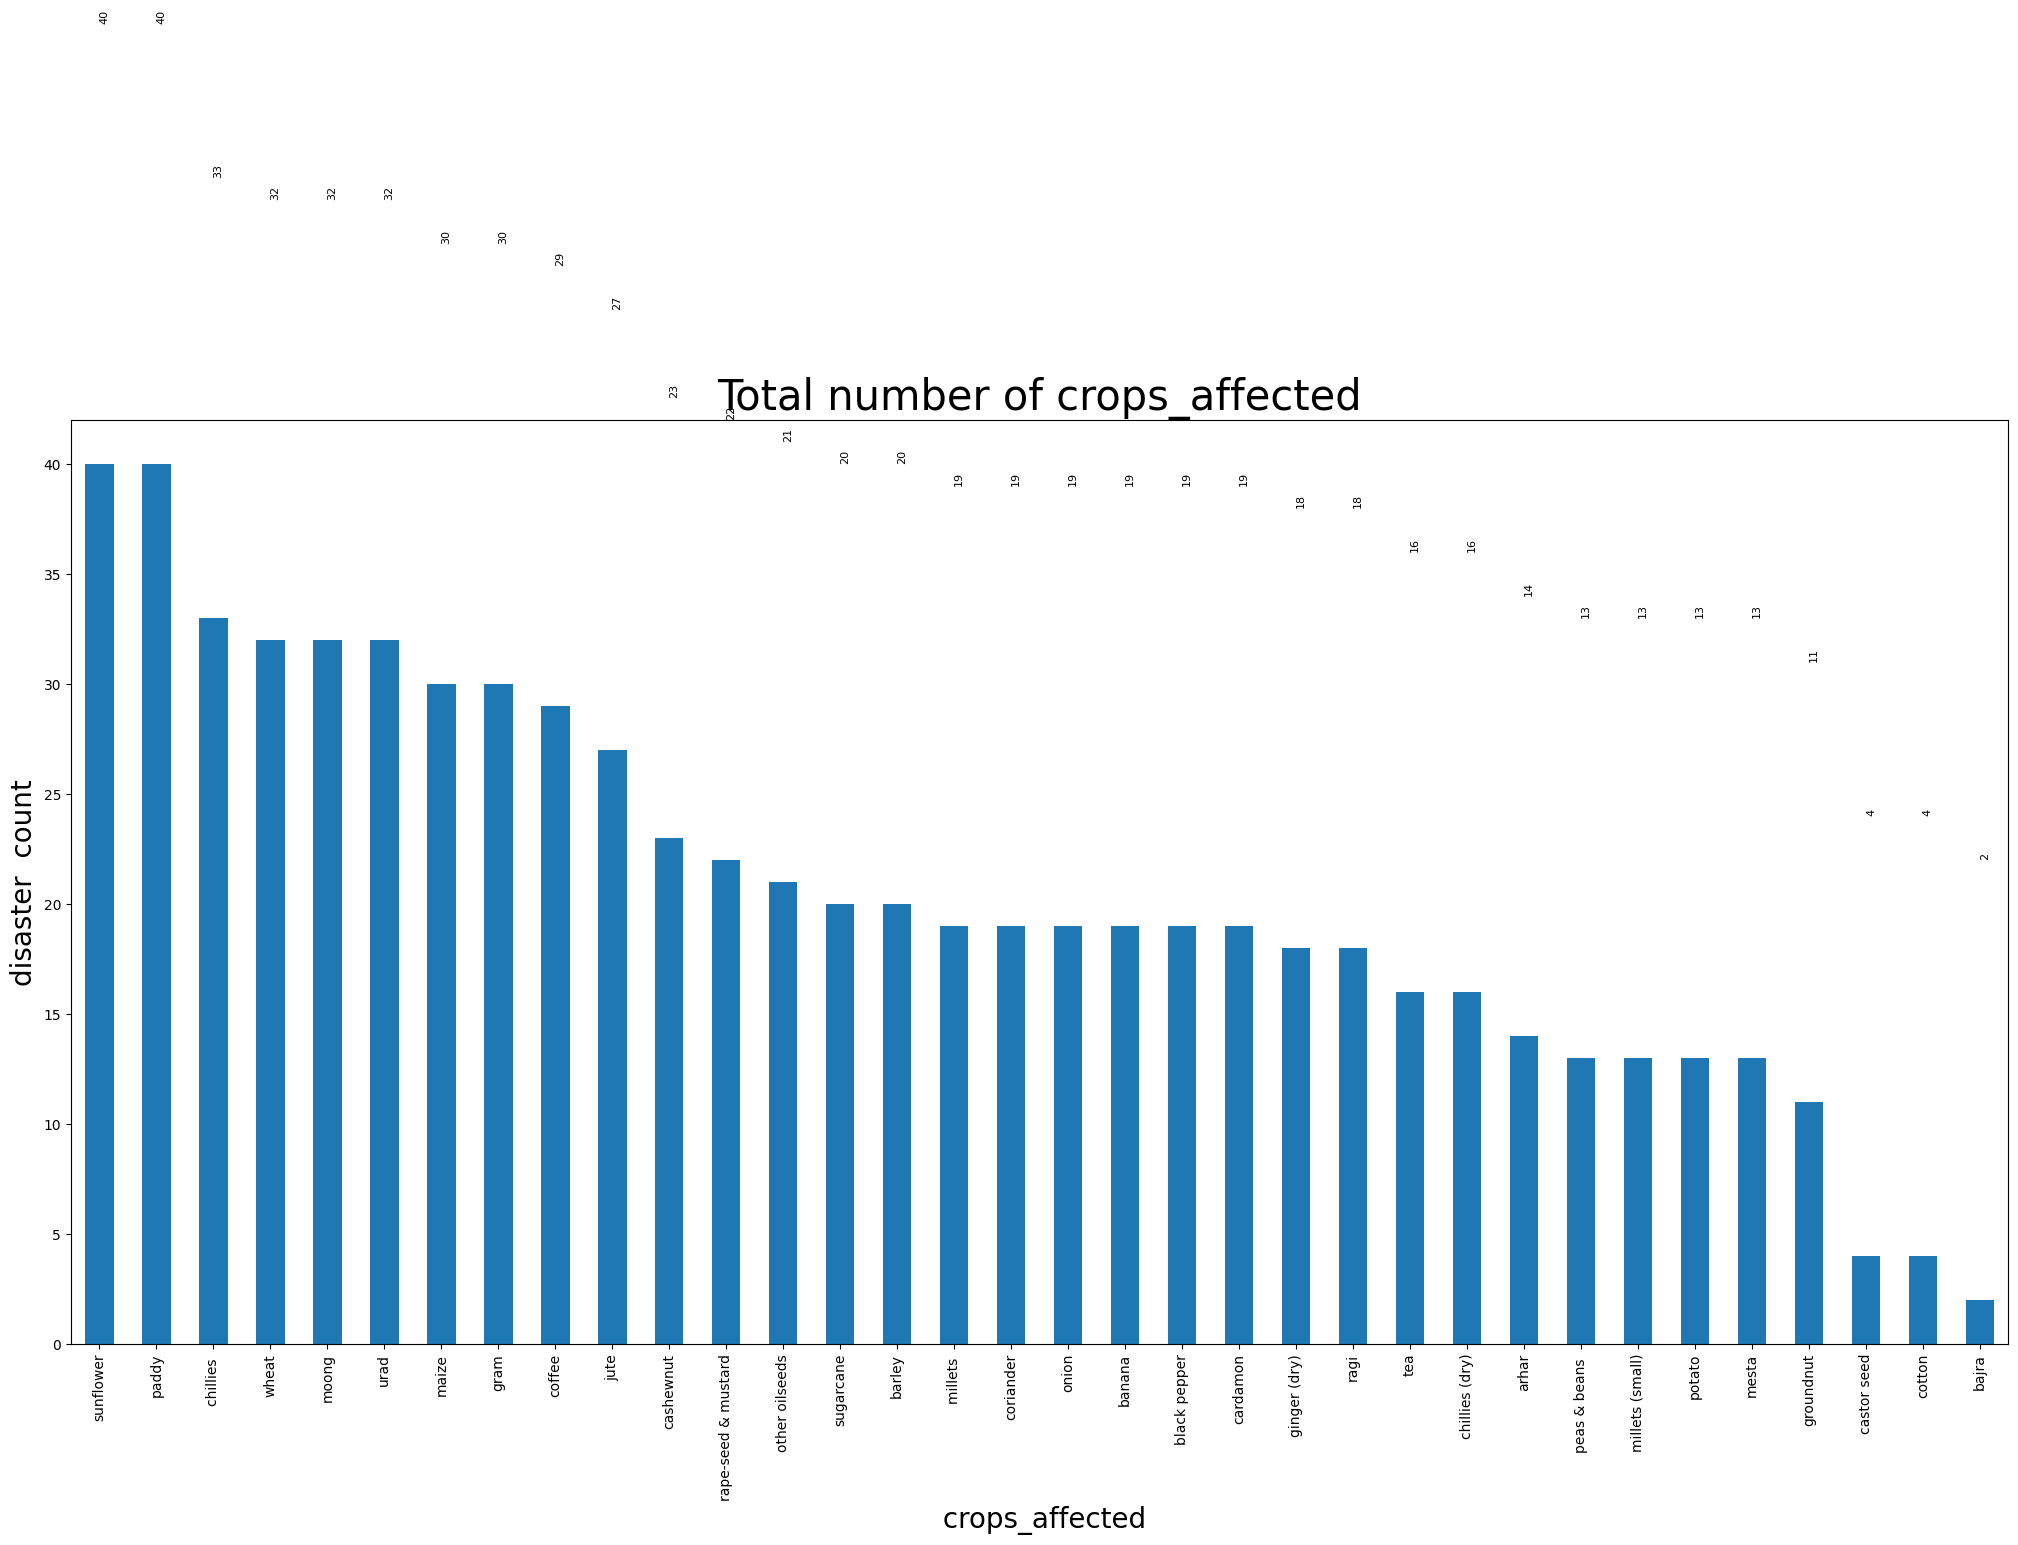

In [ ]:
# Total number of disasters crops_affected
count = data['crops_affected'].value_counts()
ax = count.plot(kind='bar', figsize=(25, 12))
ax.set_xlabel(' crops_affected', fontsize=20)
ax.set_ylabel('disaster  count', fontsize=20)
ax.set_title('Total number of crops_affected', fontsize=30)
for i, v in enumerate(count):
    plt.text(i, v+20, str(v), rotation=90, verticalalignment='bottom', fontsize=8)
plt.show()

In [ ]:
#--create result based on 'year','month', 'crops_affected'
res1 = data[['year','month', 'crops_affected']]
res1

,year,month,crops_affected
0,1995,sep,ginger (dry)
1,1995,sep,cardamon
2,1995,sep,black pepper
3,1995,sep,maize
4,1995,sep,chillies
...,...,...,...
695,2020,jan,chillies (dry)
696,2020,may,urad
697,2020,oct,wheat
698,2020,dec,moong


In [ ]:
#--create result based on 'year', 'crops_affected'
res2 = data[['year', 'crops_affected']]
res2

,year,crops_affected
0,1995,ginger (dry)
1,1995,cardamon
2,1995,black pepper
3,1995,maize
4,1995,chillies
...,...,...
695,2020,chillies (dry)
696,2020,urad
697,2020,wheat
698,2020,moong


In [ ]:
#--create result based on 'year', 'season','crops_affected'
res3 = data[['year','season','crops_affected']]
res3

,year,season,crops_affected
0,1995,winter,ginger (dry)
1,1995,winter,cardamon
2,1995,winter,black pepper
3,1995,autumn,maize
4,1995,autumn,chillies
...,...,...,...
695,2020,winter,chillies (dry)
696,2020,summer,urad
697,2020,autumn,wheat
698,2020,winter,moong


In [ ]:
#--create result based on 'year', 'season','crops_affected','nature_of_disaster
res4 = data[['year','season','crops_affected','nature_of_disaster']]
res4

,year,season,crops_affected,nature_of_disaster
0,1995,winter,ginger (dry),occasional
1,1995,winter,cardamon,occasional
2,1995,winter,black pepper,occasional
3,1995,autumn,maize,occasional
4,1995,autumn,chillies,occasional
...,...,...,...,...
695,2020,winter,chillies (dry),occasional
696,2020,summer,urad,seasonal
697,2020,autumn,wheat,seasonal
698,2020,winter,moong,seasonal


In [ ]:
#---Display nature_of_disaster of type : Seasonal
result_based_on_seasonal= res4[res4.nature_of_disaster =='seasonal']
result_based_on_seasonal

,year,season,crops_affected,nature_of_disaster
9,1995,spring,jute,seasonal
10,1995,summer,maize,seasonal
11,1995,spring,chillies,seasonal
12,1995,winter,groundnut,seasonal
13,1995,winter,ragi,seasonal
...,...,...,...,...
689,2020,autumn,paddy,seasonal
692,2020,monsoon,sunflower,seasonal
696,2020,summer,urad,seasonal
697,2020,autumn,wheat,seasonal


In [ ]:
#---Display nature_of_disaster of type : occasional
result_based_on_seasonal= res4[res4.nature_of_disaster =='occasional']
result_based_on_seasonal

,year,season,crops_affected,nature_of_disaster
0,1995,winter,ginger (dry),occasional
1,1995,winter,cardamon,occasional
2,1995,winter,black pepper,occasional
3,1995,autumn,maize,occasional
4,1995,autumn,chillies,occasional
...,...,...,...,...
691,2020,monsoon,urad,occasional
693,2020,monsoon,tea,occasional
694,2020,spring,arhar,occasional
695,2020,winter,chillies (dry),occasional


In [ ]:
#---Find result of crops affected basedon Disaaster: Occasioanl and Season : Spring
print('result of crops affected basedon Disaaster: Occasioanl and Season : Spring')
result_based_on_seasonal= res4[(res4.nature_of_disaster =='occasional') & (res4.season =='spring')]
result_based_on_seasonal

result of crops affected basedon Disaaster: Occasioanl and Season : Spring


,year,season,crops_affected,nature_of_disaster
114,1998,spring,arhar,occasional
153,2000,spring,banana,occasional
213,2003,spring,ginger (dry),occasional
216,2003,spring,barley,occasional
279,2005,spring,onion,occasional
368,2008,spring,millets,occasional
507,2014,spring,peas & beans,occasional
540,2015,spring,onion,occasional
633,2018,spring,millets,occasional
694,2020,spring,arhar,occasional


In [ ]:
#---Find result of crops affected basedon Disaaster: seasoanl and Season : Spring
print('result of crops affected basedon Disaaster: seasoanl and Season : Spring')
result_based_on_seasonal= res4[(res4.nature_of_disaster =='seasonal') & (res4.season =='spring')]
result_based_on_seasonal

result of crops affected basedon Disaaster: seasoanl and Season : Spring


,year,season,crops_affected,nature_of_disaster
9,1995,spring,jute,seasonal
11,1995,spring,chillies,seasonal
72,1997,spring,paddy,seasonal
73,1997,spring,coriander,seasonal
74,1998,spring,urad,seasonal
75,1998,spring,sunflower,seasonal
101,1998,spring,onion,seasonal
102,1998,spring,banana,seasonal
103,1998,spring,paddy,seasonal
110,1998,spring,coriander,seasonal


In [ ]:
#---Find result of crops affected basedon Disaaster: seasoanl and Season : Winter
print('result of crops affected basedon Disaaster: seasoanl and Season : Winter')
result_based_on_seasonal_winter= res4[(res4.nature_of_disaster =='seasonal') & (res4.season =='winter')]
result_based_on_seasonal_winter

result of crops affected basedon Disaaster: seasoanl and Season : Winter


,year,season,crops_affected,nature_of_disaster
12,1995,winter,groundnut,seasonal
13,1995,winter,ragi,seasonal
14,1995,winter,onion,seasonal
21,1996,winter,sunflower,seasonal
22,1996,winter,rape-seed & mustard,seasonal
...,...,...,...,...
640,2018,winter,cardamon,seasonal
655,2019,winter,sunflower,seasonal
675,2020,winter,urad,seasonal
683,2020,winter,paddy,seasonal


In [ ]:
#---Find result of crops affected basedon Disaaster: occasional and Season : Winter
print('result of crops affected basedon Disaaster: occasional and Season : Winter')
result_based_on_seasonal_winter= res4[(res4.nature_of_disaster =='occasional') & (res4.season =='winter')]
result_based_on_seasonal_winter

result of crops affected basedon Disaaster: occasional and Season : Winter


,year,season,crops_affected,nature_of_disaster
0,1995,winter,ginger (dry),occasional
1,1995,winter,cardamon,occasional
2,1995,winter,black pepper,occasional
8,1995,winter,gram,occasional
121,1999,winter,chillies,occasional
128,1999,winter,ragi,occasional
144,2000,winter,moong,occasional
175,2001,winter,jute,occasional
182,2002,winter,groundnut,occasional
193,2002,winter,sunflower,occasional


In [ ]:
#---Find result of crops affected basedon Disaaster: occasional and Season : summer
print('Result of crops affected basedon Disaaster: occasional and Season : summer')
result_based_on_seasonal_winter= res4[(res4.nature_of_disaster =='occasional') & (res4.season =='summer')]
result_based_on_seasonal_winter

Result of crops affected basedon Disaaster: occasional and Season : summer


,year,season,crops_affected,nature_of_disaster
42,1996,summer,paddy,occasional
43,1996,summer,sugarcane,occasional
85,1998,summer,wheat,occasional
115,1999,summer,chillies (dry),occasional
116,1999,summer,urad,occasional
123,1999,summer,chillies,occasional
158,2000,summer,rape-seed & mustard,occasional
191,2002,summer,sugarcane,occasional
211,2003,summer,chillies (dry),occasional
238,2004,summer,peas & beans,occasional


In [ ]:
#---Find result of crops affected basedon Disaaster: seasonal and Season : summer
print('result of crops affected basedon Disaaster: seasonal and Season : summer')
result_based_on_seasonal_winter= res4[(res4.nature_of_disaster =='seasonal') & (res4.season =='summer')]
result_based_on_seasonal_winter

result of crops affected basedon Disaaster: seasonal and Season : summer


,year,season,crops_affected,nature_of_disaster
10,1995,summer,maize,seasonal
15,1995,summer,banana,seasonal
16,1995,summer,maize,seasonal
47,1996,summer,sunflower,seasonal
63,1997,summer,ragi,seasonal
...,...,...,...,...
671,2020,summer,coriander,seasonal
672,2020,summer,urad,seasonal
673,2020,summer,sunflower,seasonal
674,2020,summer,chillies (dry),seasonal


In [ ]:
#--create result based on 'year', 'season','crops_affected','nature_of_disaster
res5 = data[['year','season','crops_affected','nature_of_disaster','state_name']]
res5


,year,season,crops_affected,nature_of_disaster,state_name
0,1995,winter,ginger (dry),occasional,Bihar
1,1995,winter,cardamon,occasional,Karnataka
2,1995,winter,black pepper,occasional,Madhya pradesh
3,1995,autumn,maize,occasional,Maharashtra
4,1995,autumn,chillies,occasional,Madyha Pradesh
...,...,...,...,...,...
695,2020,winter,chillies (dry),occasional,Assam
696,2020,summer,urad,seasonal,Madhya Pradesh
697,2020,autumn,wheat,seasonal,Himachal Pradesh
698,2020,winter,moong,seasonal,Maharashtra


In [ ]:

#---Find result of crops affected basedon Disaaster: seasonal and Season : summer in State Tamilnadu
print('result of crops affected basedon Disaaster: seasonal and Season : summer in State Tamilnadu ')
result_based_on_seasonal_winter_state= res5[(res5.nature_of_disaster =='seasonal') & (res5.season =='summer') & (res5.state_name =='Tamil Nadu')]
result_based_on_seasonal_winter_state

result of crops affected basedon Disaaster: seasonal and Season : summer in State Tamilnadu 


,year,season,crops_affected,nature_of_disaster,state_name
129,1999,summer,onion,seasonal,Tamil Nadu
146,2000,summer,gram,seasonal,Tamil Nadu
147,2000,summer,jute,seasonal,Tamil Nadu
252,2004,summer,coffee,seasonal,Tamil Nadu
253,2004,summer,gram,seasonal,Tamil Nadu
259,2004,summer,coffee,seasonal,Tamil Nadu
280,2005,summer,banana,seasonal,Tamil Nadu
306,2006,summer,millets (small),seasonal,Tamil Nadu
353,2008,summer,gram,seasonal,Tamil Nadu
371,2008,summer,coffee,seasonal,Tamil Nadu


In [ ]:

#---Find result of crops affected basedon Disaaster: seasonal and Season : winter in State Tamilnadu
print('result of crops affected basedon Disaaster: seasonal and Season : winter in State Tamilnadu ')
result_based_on_seasonal_winter_state_winter= res5[(res5.nature_of_disaster =='seasonal') & (res5.season =='winter') & (res5.state_name =='Tamil Nadu')]
result_based_on_seasonal_winter_state_winter

result of crops affected basedon Disaaster: seasonal and Season : winter in State Tamilnadu 


,year,season,crops_affected,nature_of_disaster,state_name
223,2003,winter,moong,seasonal,Tamil Nadu
402,2009,winter,cardamon,seasonal,Tamil Nadu
428,2011,winter,chillies,seasonal,Tamil Nadu
481,2013,winter,moong,seasonal,Tamil Nadu
496,2013,winter,moong,seasonal,Tamil Nadu
536,2015,winter,millets (small),seasonal,Tamil Nadu
570,2017,winter,tea,seasonal,Tamil Nadu
589,2017,winter,tea,seasonal,Tamil Nadu
640,2018,winter,cardamon,seasonal,Tamil Nadu


In [ ]:

#---Find result of crops affected basedon Disaaster: seasonal and Season : winter in State Tamilnadu
print('result of crops affected basedon Disaaster: seasonal and monsoon : winter in monsoon ')
result_based_on_seasonal_winter_state_winter= res5[(res5.nature_of_disaster =='seasonal') & (res5.season =='monsoon') & (res5.state_name =='Tamil Nadu')]
result_based_on_seasonal_winter_state_winter

result of crops affected basedon Disaaster: seasonal and monsoon : winter in monsoon 


,year,season,crops_affected,nature_of_disaster,state_name
109,1998,monsoon,paddy,seasonal,Tamil Nadu
112,1998,monsoon,sunflower,seasonal,Tamil Nadu
118,1999,monsoon,cardamon,seasonal,Tamil Nadu
149,2000,monsoon,chillies,seasonal,Tamil Nadu
150,2000,monsoon,groundnut,seasonal,Tamil Nadu
152,2000,monsoon,onion,seasonal,Tamil Nadu
173,2001,monsoon,chillies,seasonal,Tamil Nadu
196,2002,monsoon,ragi,seasonal,Tamil Nadu
291,2005,monsoon,tea,seasonal,Tamil Nadu
303,2006,monsoon,maize,seasonal,Tamil Nadu


In [ ]:
#---Find result of crops affected basedon Disaaster: seasonal and Season : winter in State Tamilnadu
print('result of crops affected basedon Disaaster: occasional and Season : winter in State Tamilnadu ')
result_based_on_seasonal_winter_state_winter= res5[(res5.nature_of_disaster =='seasonal') & (res5.season =='winter') & (res5.state_name =='Tamil Nadu')]
result_based_on_seasonal_winter_state_winter

result of crops affected basedon Disaaster: occasional and Season : winter in State Tamilnadu 


,year,season,crops_affected,nature_of_disaster,state_name
223,2003,winter,moong,seasonal,Tamil Nadu
402,2009,winter,cardamon,seasonal,Tamil Nadu
428,2011,winter,chillies,seasonal,Tamil Nadu
481,2013,winter,moong,seasonal,Tamil Nadu
496,2013,winter,moong,seasonal,Tamil Nadu
536,2015,winter,millets (small),seasonal,Tamil Nadu
570,2017,winter,tea,seasonal,Tamil Nadu
589,2017,winter,tea,seasonal,Tamil Nadu
640,2018,winter,cardamon,seasonal,Tamil Nadu


In [ ]:
#---Find result of crops affected basedon Disaaster: seasonal and Season : winter in State Tamilnadu
print('result of crops affected basedon Disaaster: occasional and Winter in State Tamilnadu ')
result_based_on_seasonal_winter_state_winter= res5[(res5.nature_of_disaster =='occasional') & (res5.season =='winter') & (res5.state_name =='Tamil Nadu')]
result_based_on_seasonal_winter_state_winter


result of crops affected basedon Disaaster: occasional and Winter in State Tamilnadu 


,year,season,crops_affected,nature_of_disaster,state_name
420,2010,winter,jute,occasional,Tamil Nadu
525,2015,winter,millets (small),occasional,Tamil Nadu


In [18]:
#-------------Apply Deep Learning ...with Input, Training data-------------
import numpy as np

class deep_learning():

    def __init__(self):
        import pandas as pd
        nRowsRead = 1000 # specify 'None' if want to read whole file
        # natural_disaster_dataset in india till 2020 with  loading/previewing the first 1000 rows
        df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crop/natural_disaster_dataset.csv')
      #  df2 = pd.read_csv('natural_disaster_dataset.csv', delimiter=',', nrows = nRowsRead)
        df2.dataframeName = 'natural_disaster_dataset.csv'
        nRow, nCol = df2.shape
        print(f'There are {nRow} rows and {nCol} columns passed as Input Data of natural_disaster_dataset')



        nRowsRead = None # specify 'None' if want to read whole file
        df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crop/cropdetails.csv')
      #  df1 = pd.read_csv('cropdetails.csv', delimiter=',', nrows = nRowsRead)
        df1.dataframeName = 'cropdetails.csv'
        nRow, nCol = df1.shape
        print(f'There are {nRow} rows and {nCol} columns passed as Training Data cropdetails ')
        # seeding for random number generation
        np.random.seed(1)

        #converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):

        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via  the neuron
            output = self.think(training_inputs)

            #computing error rate for back-propagation
            error = training_outputs - output

            #performing weight adjustments
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        #passing the inputs via the neuron to get output
        #converting values to floats

        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    #initializing the neuron class
    deep_learning = deep_learning()

    print("Natural disaster on crop  Randomly Generated Weights: ")
    print(deep_learning.synaptic_weights)

    #training data consisting of 4 examples--3 input values and 1 output
    training_inputs = np.array([[1,1,0],
                                [0,1,0],
                                [1,0,0],
                                [1,1,1]])

    training_outputs = np.array([[0,1,0,1]]).T

    #training taking place
    deep_learning.train(training_inputs, training_outputs, 1000)

    print("Natural disaster on crop  Analysis and prediction  Ending Weights After Training: ")
    print(deep_learning.synaptic_weights)

    user_input_one = "2000"
    user_input_two = "2015"
    user_input_three = "2021"

    print("Considering New Situation of Natural disaster on crop of years : ", user_input_one, user_input_two, user_input_three)
    #print("New Output data of Accuracy level ")
    acc=(deep_learning.think(np.array([user_input_one, user_input_two, user_input_three]))*9.01*10)
    acccuracy=acc
    #print("Accuracy in percentage %",acccuracy)




There are 700 rows and 11 columns passed as Input Data of natural_disaster_dataset
There are 772 rows and 7 columns passed as Training Data cropdetails 
Natural disaster on crop  Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Natural disaster on crop  Analysis and prediction  Ending Weights After Training: 
[[-6.11442809]
 [ 3.13531908]
 [ 6.3262046 ]]
Considering New Situation of Natural disaster on crop of years :  2000 2015 2021


In [19]:
 print("New Output data of Accuracy level :")
 print("Accuracy in percentage %",acccuracy)

New Output data of Accuracy level :
Accuracy in percentage % [90.1]


In [ ]:
print("Natural disasters and Crop disasteer are compared and anlyzed ")

Natural disasters and Crop disasteer are compared and anlyzed 
